**Import the csv file**

In [22]:
import pandas as pd
data = pd.read_csv("/content/twitter_training.csv", error_bad_lines=False)

<ipython-input-22-6651c9fd7875>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/twitter_training.csv", error_bad_lines=False)


**Display first 10 records**

In [23]:
data.head(10)

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


**Importing libraries which are necessary for this task**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Load the validation dataset
data1 = pd.read_csv("/content/twitter_validation.csv")
data1.head(10)

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


**Preprocessing and model Training**

In [41]:

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(data["Sentiment"])
X_val = vectorizer.transform(data1["Sentiment"])


model = MultinomialNB(alpha=1.5)
model.fit(X_train, data['Sentiment'])

MultinomialNB(alpha=1.5)

In [45]:
# Prediction on the validation set
predictions = model.predict(X_val)

from sklearn.metrics import f1_score

f1 = f1_score(data1['Sentiment'], predictions,average='micro')
print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


In [29]:
# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(data1['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(data1['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       171
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

Confusion Matrix:
 [[171   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


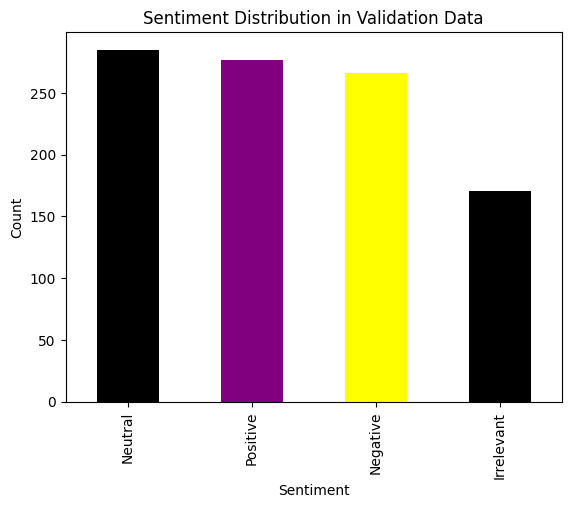

In [32]:
# Visualization - sentiment distribution
sentiment_distribution = data1['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['black', 'purple', 'yellow'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

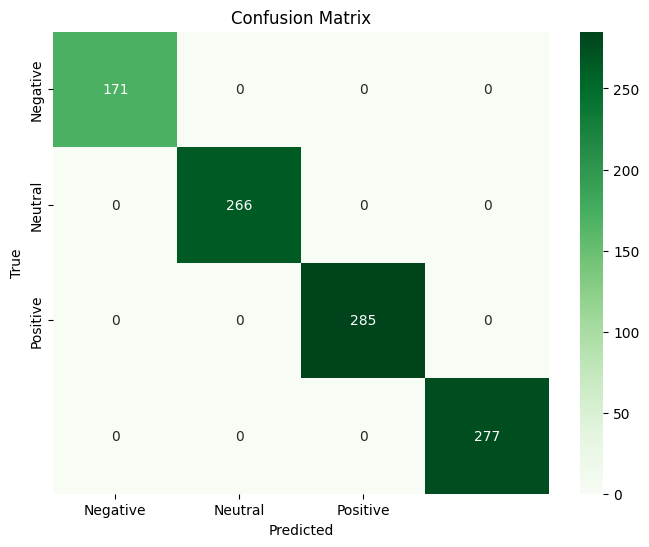

In [37]:
# Additional Analysis and Visualizations
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(data1['Sentiment'], predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



<ipython-input-40-231282dfa66a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette=['indigo', 'pink', 'black'])
<ipython-input-40-231282dfa66a>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=predictions, palette=['indigo', 'pink', 'black'])


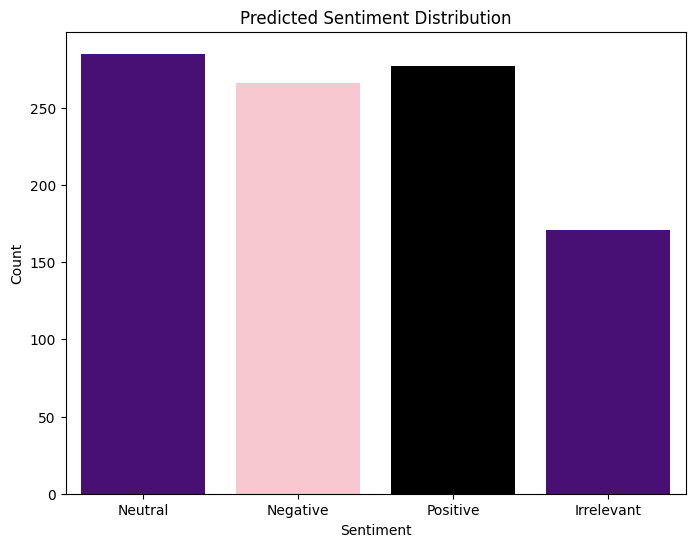

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette=['indigo', 'pink', 'black'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [ ]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation
        tokens = [word for word in tokens if word.isalpha()]
        # Convert to lowercase
        tokens = [word.lower() for word in tokens]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in stop_words]
        return ' '.join(tokens)
    else:
        return ''  # Return empty string if text is not a string

In [ ]:
# Apply preprocessing and sentiment analysis
data['clean_text'] = data['Tweet Content'].apply(preprocess_text)
data['sentiment_score'] = data['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

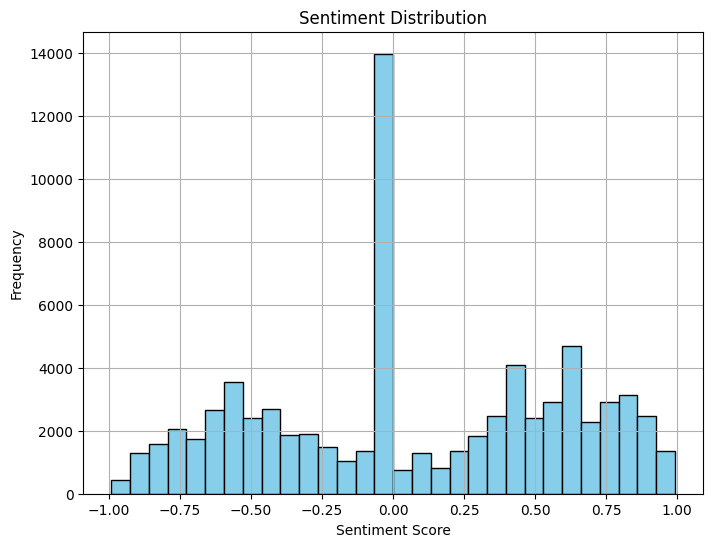

In [51]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

In [ ]:
# Convert 'text' column to string type and handle missing values
data['Tweet Content'] = data['Tweet Content'].astype(str)

# Ensure 'text' column contains only string values
data['Tweet Content'] = data['Tweet Content'].apply(lambda x: x if isinstance(x, str) else "")

In [ ]:
# Function to get sentiment scores
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis
data['sentiment_score'] = data['Tweet Content'].apply(get_sentiment_score)

# Generate word cloud of positive and negative sentiments
positive_text = ' '.join(data[data['sentiment_score'] > 0]['Tweet Content'])
negative_text = ' '.join(data[data['sentiment_score'] < 0]['Tweet Content'])

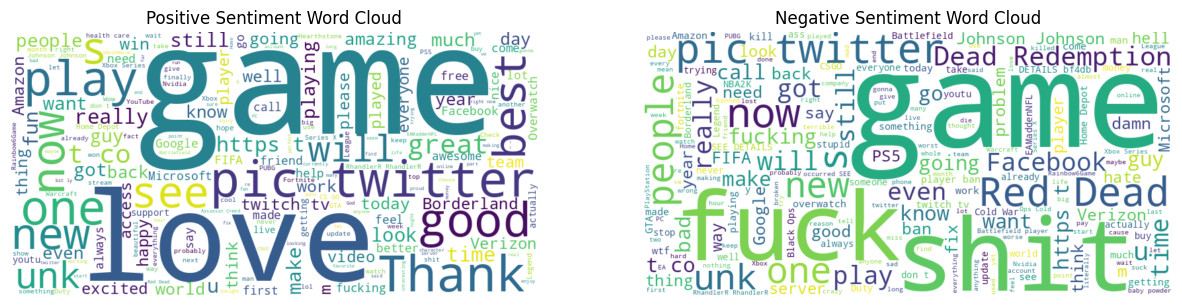

In [73]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()
